In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from PlaceImageLogo import PlaceImageLogo

In [2]:
# read image

image = cv2.imread("D:/Study/DataScience/OpenCV/basket2.jpg")
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#tagline
tagline = 'This is the tagline'

#image_logo = False
image_logo = True

# read logo
logo = cv2.imread("D:\Study\DataScience\OpenCV\logo.jpg")
logo = cv2.cvtColor(logo, cv2.COLOR_BGR2RGB)
logo = cv2.resize(logo, (160, 80))

In [3]:
class AddTagline:
    
    def __init__(self):
        self
        
    def object_intersect(self, image, tagline): 
        
        self.image = image
        
        self.image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)

        self.img_gr = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)

        self.ret, self.thresh = cv2.threshold(self.img_gr, 127, 255, 0)

        self.contours, self.heirarchy = cv2.findContours(self.thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
     
        # font 
        self.font = cv2.FONT_HERSHEY_SIMPLEX 

        # fontScale 
        self.fontScale = 2
        
        # Yellow font color in RGB 
        self.color = (255,0,0) 
  
        # Line thickness of 2 px 
        self.thickness = 2

        # text to be placed on image
        self.tagline = tagline
        
        self.textsize = cv2.getTextSize(self.tagline, self.font, self.fontScale, self.thickness)[0]

        # origin 
        self.org_top = (int((self.image.shape[1]-self.textsize[0])/2),int(self.image.shape[0]*15/100))

        self.org_bottom = (int((self.image.shape[1]-self.textsize[0])/2),self.image.shape[0] - int(self.image.shape[0]*15/100))
  

        for contour in self.contours:
            (self.x, self.y, self.w, self.h) = cv2.boundingRect(contour)
            
            if (self.x >= self.org_top[0] and self.x <= self.org_top[0] + self.textsize[0]) and (self.y >= self.org_top[1] - self.textsize[1] and self.y <= self.org_top[1]):
                return True
                break
  
        # This else executes only if break is NEVER reached and loop terminated after all iterations. 
        else:
            return False 
        
    def add_tagline_bottom(self):
        self.tagged_image = cv2.putText(self.image, self.tagline, 
                                        self.org_bottom, self.font, self.fontScale, self.color, self.thickness, cv2.LINE_AA)
        
        return self.tagged_image
    
    def add_tagline_top(self):
        self.tagged_image = cv2.putText(self.image, self.tagline, 
                                        self.org_top, self.font, self.fontScale, self.color, self.thickness, cv2.LINE_AA)
        
        return self.tagged_image
            

In [4]:
t = AddTagline()

In [5]:
is_intersect = t.object_intersect(image, tagline)

is_intersect


False

Has no intersect and logo


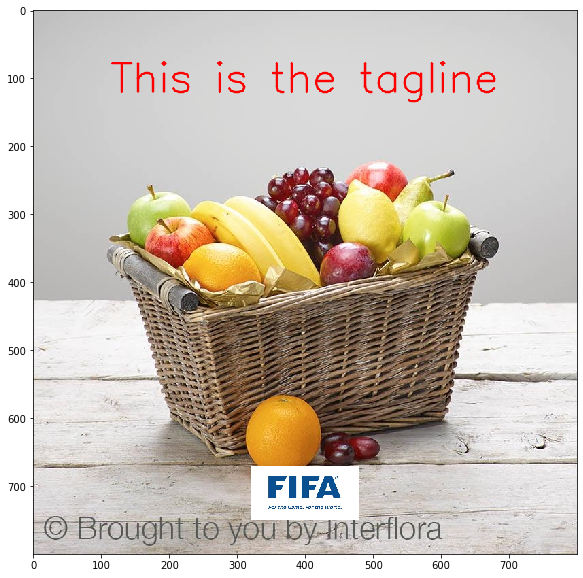

In [6]:
if is_intersect:
    if image_logo is False:
        print('Has intersect and no logo')
        layout = t.add_tagline_bottom()
        plt.figure(figsize=(12,10))
        plt.imshow(layout)
        # imagetagline bottom
    else:
        print('Has intersect and logo')
        layout = t.add_tagline_bottom()
        a = PlaceImageLogo()
        layout = a.place_logo(layout, logo, 'tl')
        plt.figure(figsize=(12,10))
        plt.imshow(layout)
               
        # place_logo(image, logo, location) --> tmp.place_logo(image, logo, 'tl')
        #tagged_image = cv2.putText(image, text, org_bottom, font, fontScale, color, thickness, cv2.LINE_AA)
        
else:
    if image_logo is False:        
        print('Has no intersect and no logo')
        layout = t.add_tagline_top()
        plt.figure(figsize=(12,10))
        plt.imshow(layout)
        
        # tagged_image = cv2.putText(image, text, org_top, font, fontScale, color, thickness, cv2.LINE_AA)
        # imagetagline top
    else:
        print('Has no intersect and logo')
        layout = t.add_tagline_top()
        a = PlaceImageLogo()
        layout = a.place_logo(layout, logo)
        plt.figure(figsize=(12,10))
        plt.imshow(layout)
        
        #tmp.place_logo(image, logo) --> place_logo(image, logo)
        # tagged_image = cv2.putText(image, text, org_top, font, fontScale, color, thickness, cv2.LINE_AA)